https://www.kaggle.com/ajaymanwani/loan-approval-prediction

In [1]:
## importing necrssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('M8_project_file.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 1. Variable analysis

In [3]:
## for decision tree, we will look for cat. and num. variables, and seperate them first
## to check values in each of them
data = data.drop(columns = ['Loan_ID'])
cat_var = ['Gender', 'Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
num_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [4]:
## now we will check for missing values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### analysing variables using graph

In [5]:
# we will first analyse categorical variable by the help of bargraphs 
# and look for which variables are responsible for loan approval and how much.

def UVA_cat(var_group):
    size = len(var_group)
    plt.figure(figsize = (4*size,40), dpi = 150 )
    
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts()
        n_unique = data[i].nunique()
        
        ## plotting data
        plt.subplot(4,2, j+1)
        sns.countplot(x= data[i], data = data, hue = 'Loan_Status', order = norm_count.index)
        plt.xlabel('{}'.format(i))
        plt.ylabel('count')
        plt.title('n_unique = {} \n value counts \n {}'.format(n_unique, norm_count))

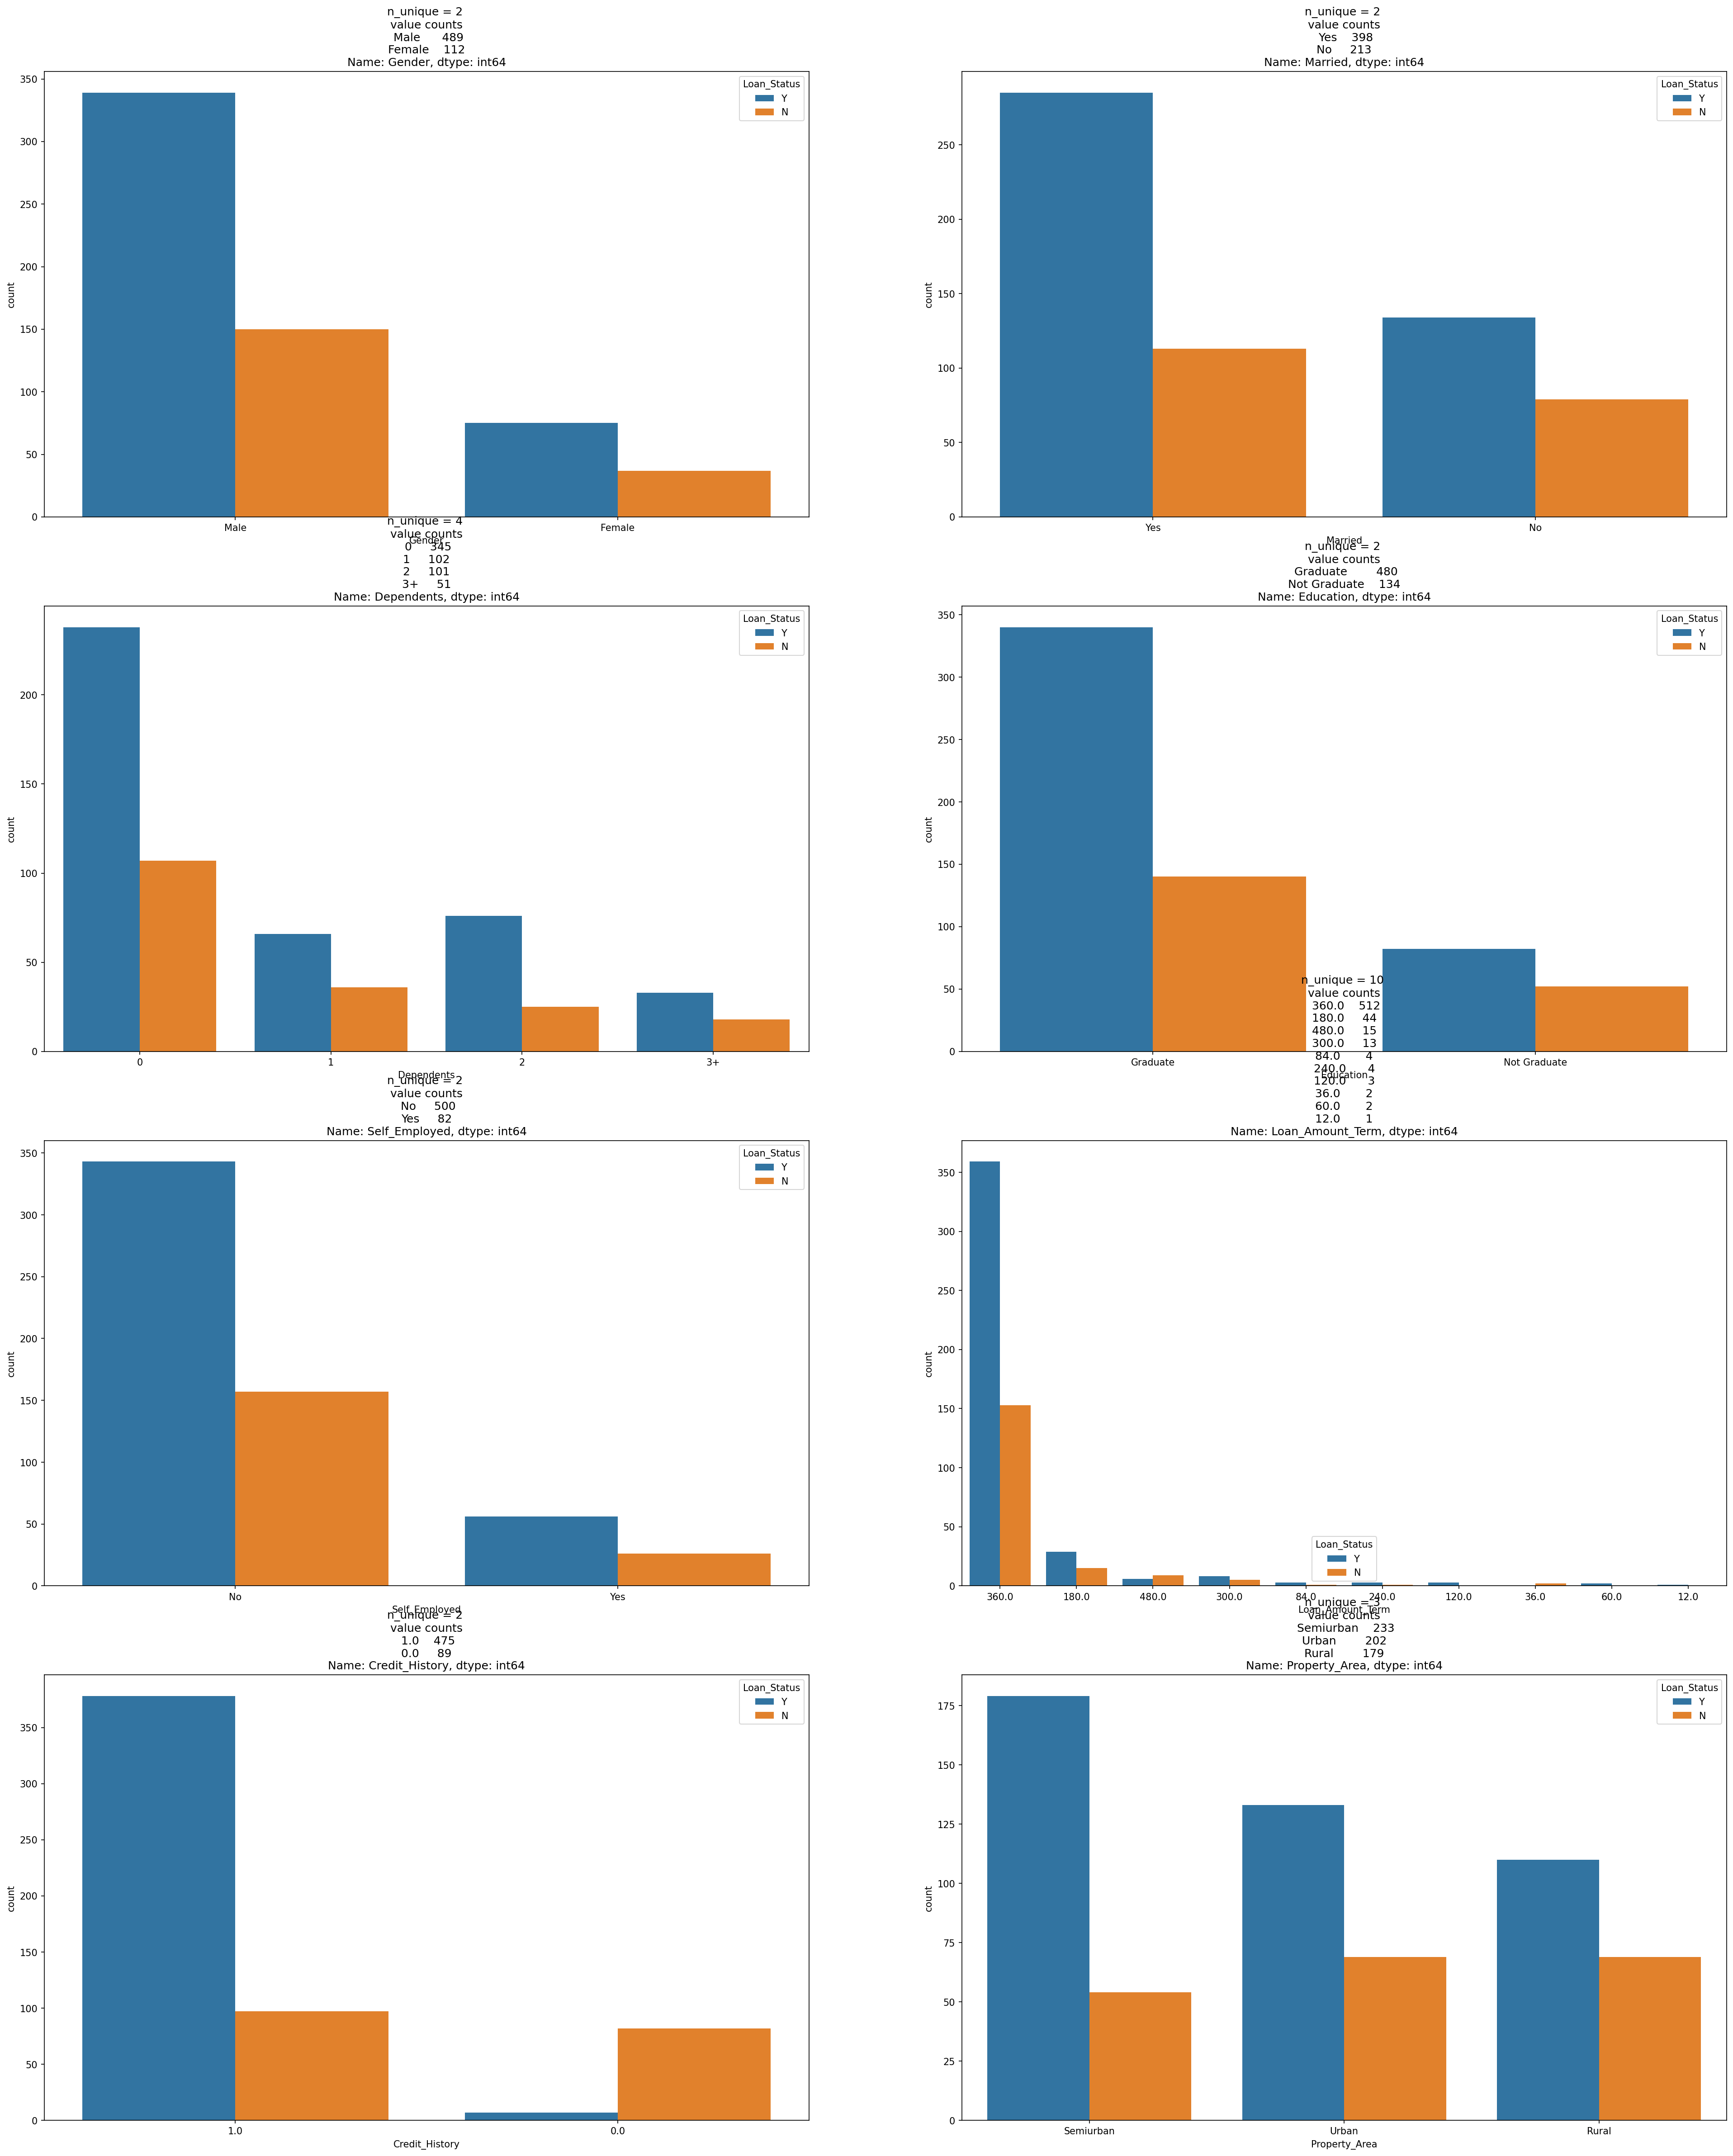

In [6]:
UVA_cat(cat_var)

**Summery**
* almost 2/3 persons are approved for loan.
* Gender - more male applicants present
* marrital status - married people are more and they arae approved more than unmarried
* Dependents = people with less dependents are approved for loan more
* Education - graduated people getting approved more
* Self_employment = almost 5/6 population is not self employed but still getting approval
* loan_term = lot of loans are taken for 360 months
* credit history = no credit history leads to no approval
* property area = more  population from semi urban area and more likely to get approved

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


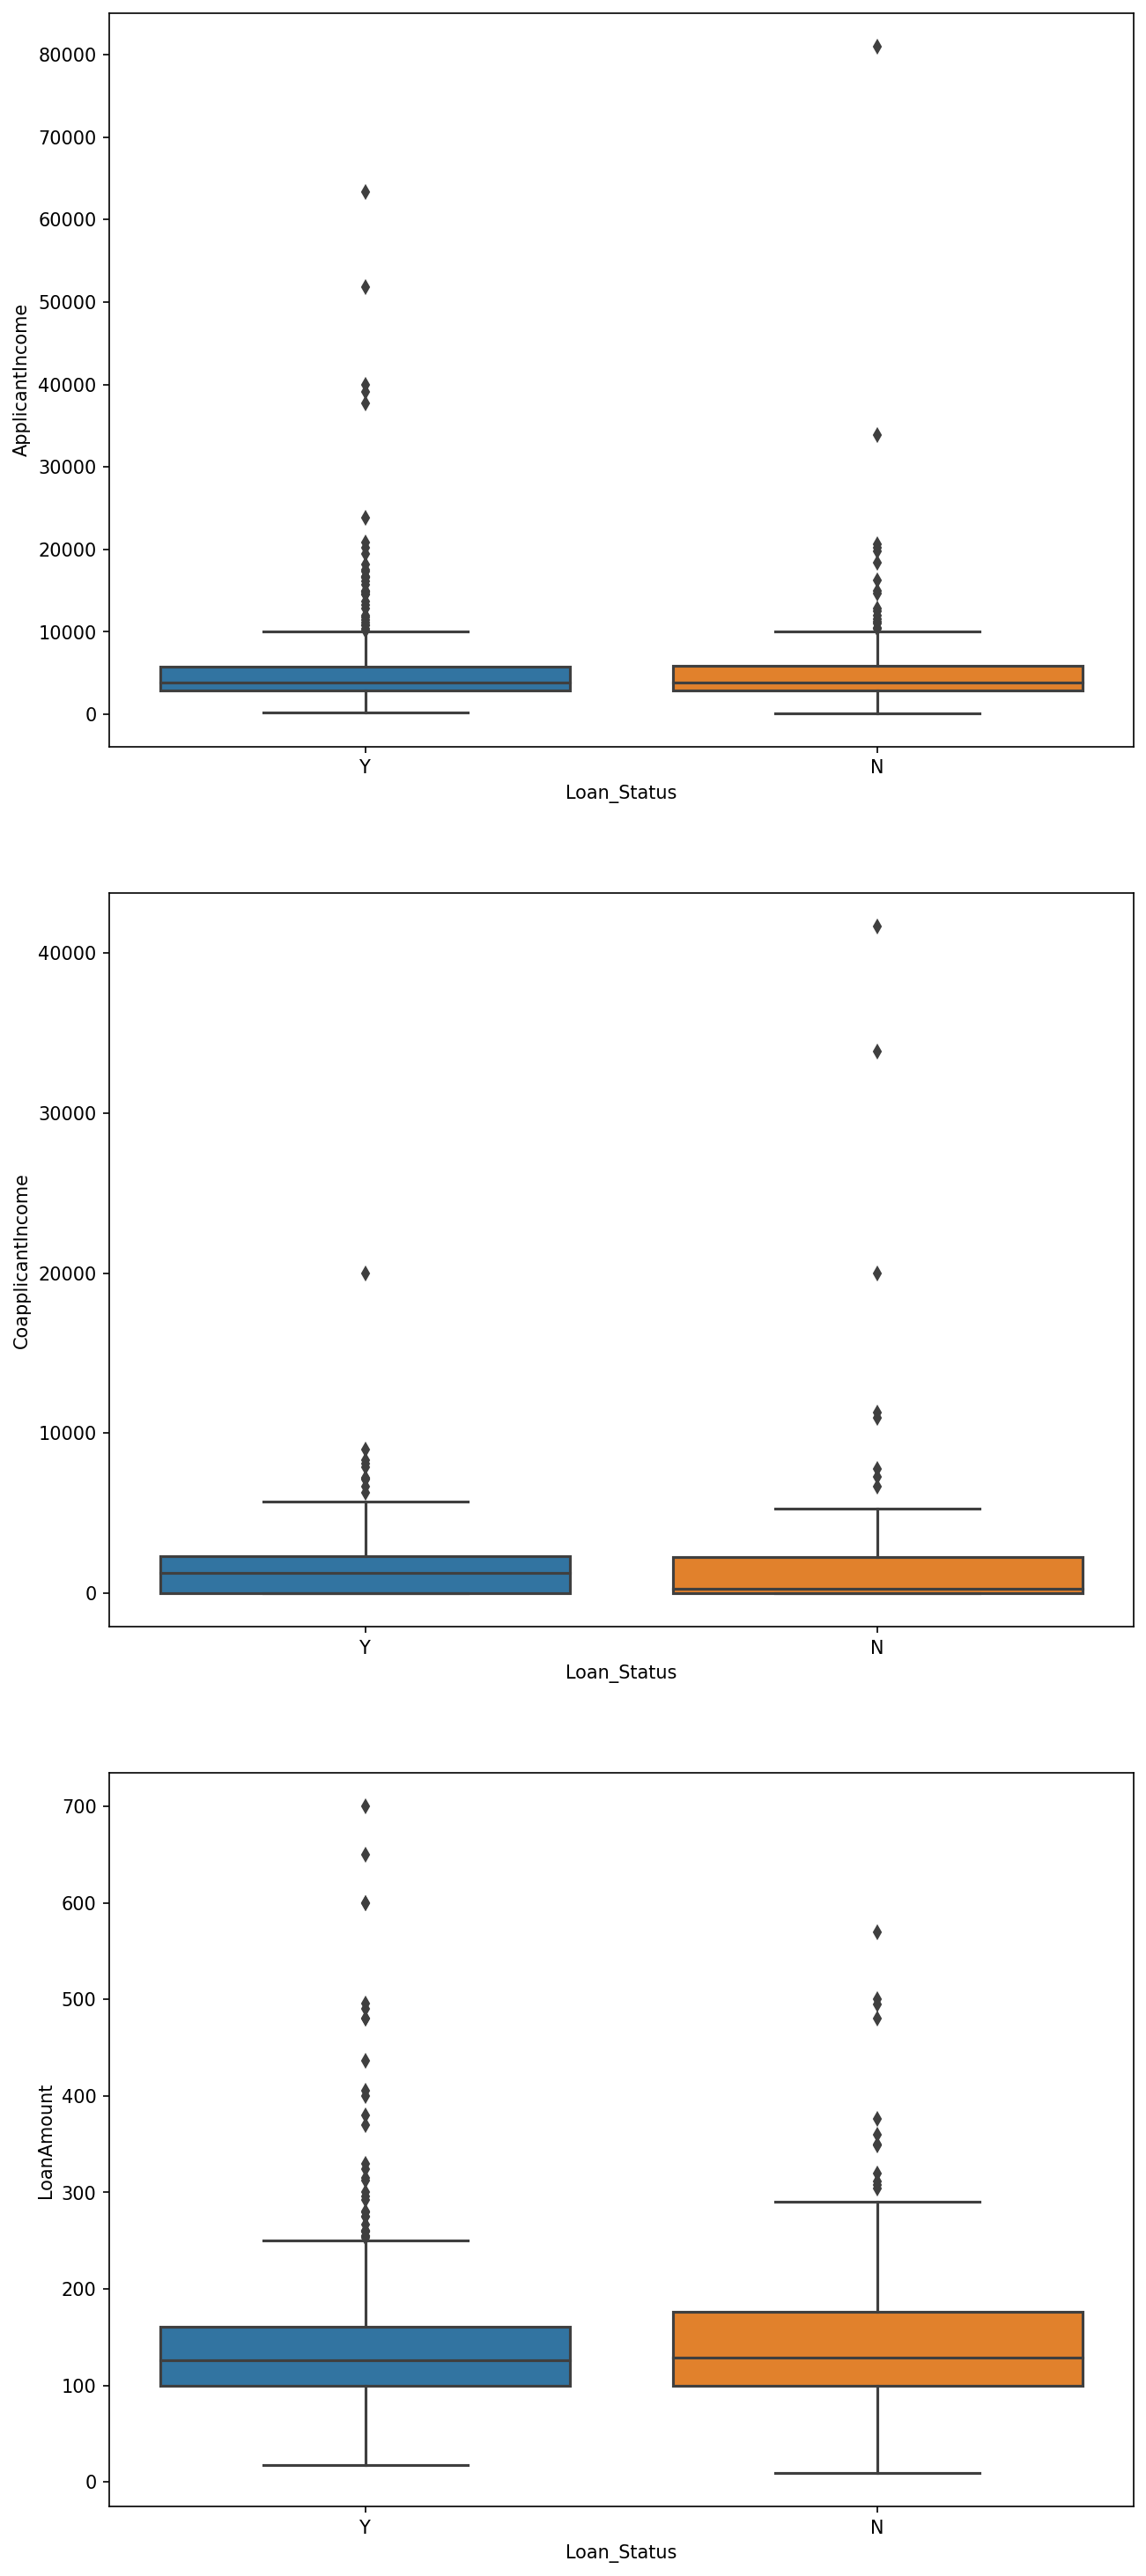

In [7]:
## now visualise numerical variable
plt.figure(figsize=(10,25), dpi = 150)
for idx,cols in enumerate(num_var):
    plt.subplot(3,1, idx+1)
    sns.boxplot(x= 'Loan_Status', y = cols, data = data)
    
print(data[num_var].describe())

**summery**
* there is no significant relation between numerical variales and loan approval

# 2. Preprocessing Data

In [8]:
## 1. getting dummy variables for all categorical variables
data1 = pd.get_dummies(data, drop_first = True)
data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [31]:
## 2. now we will impute missing values
x = data1.drop(columns ='Loan_Status_Y')
y = data1['Loan_Status_Y']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean')
x = imputer.fit_transform(x)

In [10]:
cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Married_Yes',
       'Dependents_1','Dependents_2','Dependents_3+',
       'Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']

In [11]:
x_df = pd.DataFrame(data = x, columns = cols )
x_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4106.0,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,8072.0,240.0,253.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# 3. Model Building

In [12]:
## we need to first divide data into train and test sets 
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.2, random_state =42, stratify = y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((491, 14), (123, 14), (491,), (123,))

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

DTC = DecisionTreeClassifier(class_weight = 'balanced')
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [14]:
train_pred = DTC.predict(xtrain)
print('accuracy score for train set =', accuracy_score(ytrain, train_pred))
print('f1 score for train set =', f1_score(ytrain, train_pred))

accuracy score for train set = 1.0
f1 score for train set = 1.0


In [15]:
test_pred = DTC.predict(xtest)
print('accuracy score for test set =', accuracy_score(ytest, test_pred))
print(' f1 score for test set =',f1_score(ytest, test_pred))

accuracy score for test set = 0.7804878048780488
 f1 score for test set = 0.834355828220859


**summery**
* Here we can clearly see train score > test score, our model is overfitting
* we will try hyperparameter tuning

In [16]:
## we need to visualise tree for different accuracy graphs for different parameters
## we will define custom functions for score calculation and for plot

## function for score 
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)
    
    trainpred = model.predict(x1)
    f1 = f1_score(y1, trainpred)
    
    testpred = model.predict(x2)
    f2 = f1_score(y2, testpred)
    return f1, f2

In [17]:
## function for plotting graph
def effect(train_score, test_score, x_range, title):
    plt.figure(figsize = (6,7), dpi = 140)
    plt.plot(x_range, train_score, color = 'red', label = 'train')
    plt.plot(x_range, test_score, color = 'blue', label = 'test')
    plt.title(title)
    plt.xlabel('parameter')
    plt.ylabel('f1_score')
    plt.legend()
    plt.show()

# Visualisation of parameters 

In [18]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier

In [19]:
maxdepth = [i for i in range(1, 20)]
train = []
test = []

for i in maxdepth:
    model = DTC(class_weight ='balanced',max_depth=i, random_state = 42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)

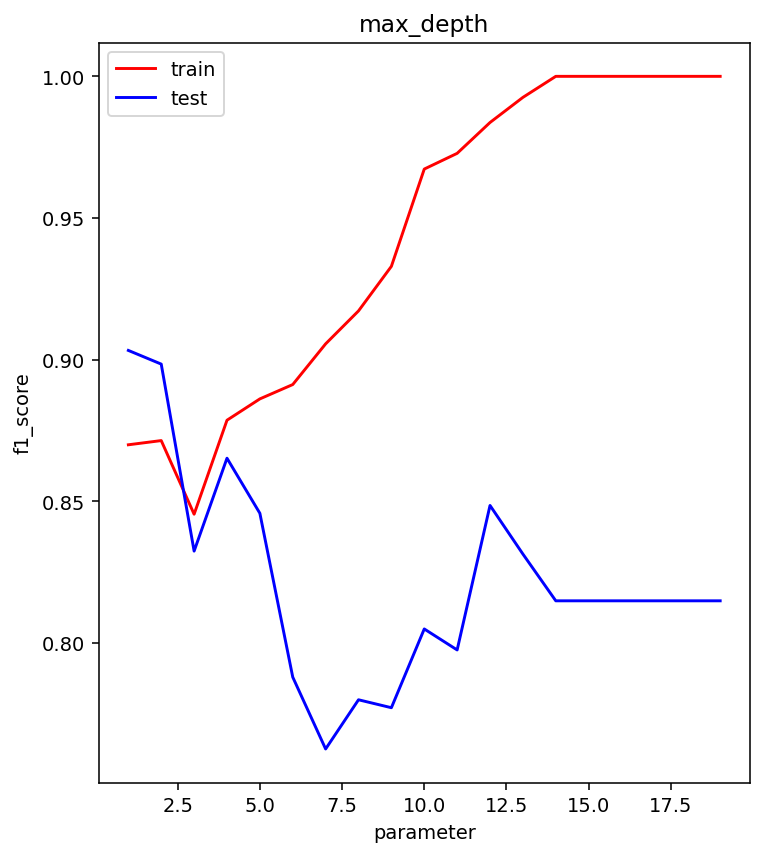

In [20]:
effect(train, test, range(1,20), 'max_depth')

* Visulising tree with maxdepth = 4

In [21]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


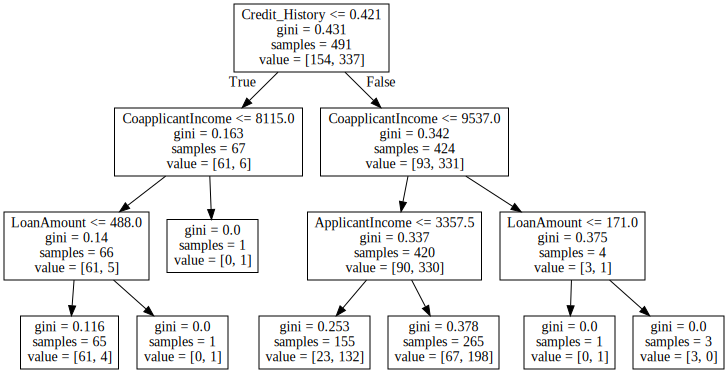

In [29]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(xtrain,ytrain)
dot_data = tree.export_graphviz(tree_clf,feature_names = x_df.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [27]:
## minimum samples at leaf node

samlist = [i for i in range(1,80,3)]
train = []
test = []

for i in samlist:
    model = DTC(class_weight ='balanced',max_depth=3, min_samples_leaf = i, random_state = 42)
    f1, f2 = calc_score(model, xtrain, ytrain, xtest, ytest)
    train.append(f1)
    test.append(f2)

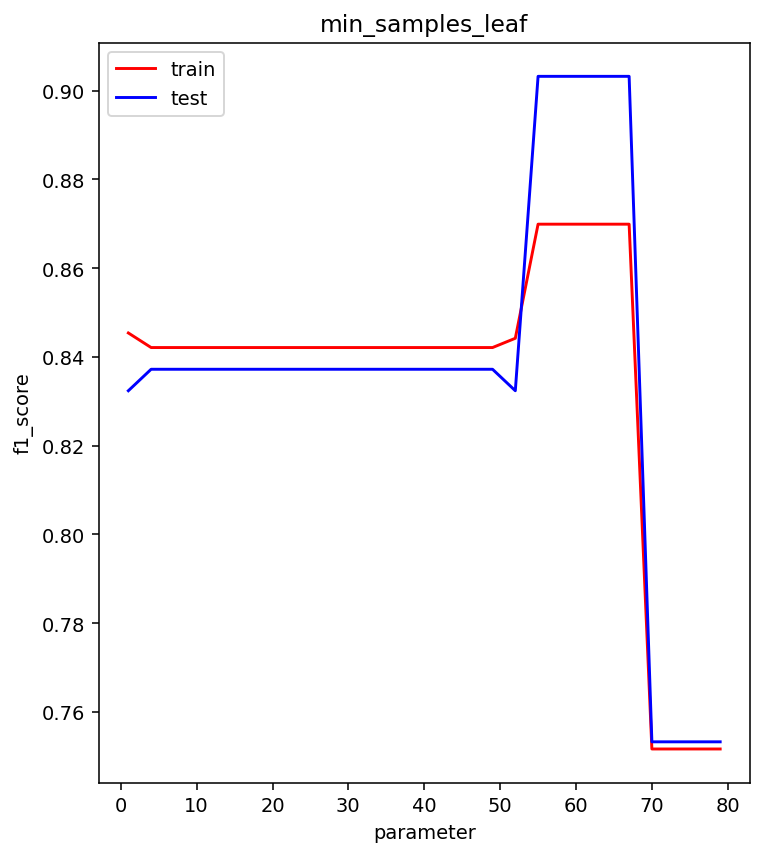

In [28]:
effect(train, test, range(1,80,3), 'min_samples_leaf')

**summery**
* as we have seen,for max depth = 3, we got grapth for min samples at leaf and from that grapth we can interpret that good f1 value lies between 55 to 60. we will choose
* maxdepth = 3
* min_samples_leaf = 55
* and see how other parameters behave

In [32]:
from sklearn.metrics import confusion_matrix
tree = DTC(max_depth = 3, min_samples_leaf = 55, class_weight = 'balanced')
tree.fit(xtrain,ytrain)
pred_y = tree.predict(xtest)

In [33]:
print('accuracy on test data =', accuracy_score(ytest, pred_y))
print('f1 score on test data =', f1_score(ytest, pred_y))

accuracy on test data = 0.8536585365853658
f1 score on test data = 0.903225806451613


In [36]:
cfm = pd.crosstab(ytest, pred_y, rownames =['True'], colnames = ['predicted'], margins = True)
print('confusion matrix for test data =')
print(cfm)

confusion matrix for test data =
predicted   0    1  All
True                   
0          21   17   38
1           1   84   85
All        22  101  123


# 3. Feature Importance

In [37]:
imp_features = pd.Series(tree.feature_importances_, index = x_df.columns)
k = imp_features.sort_values()

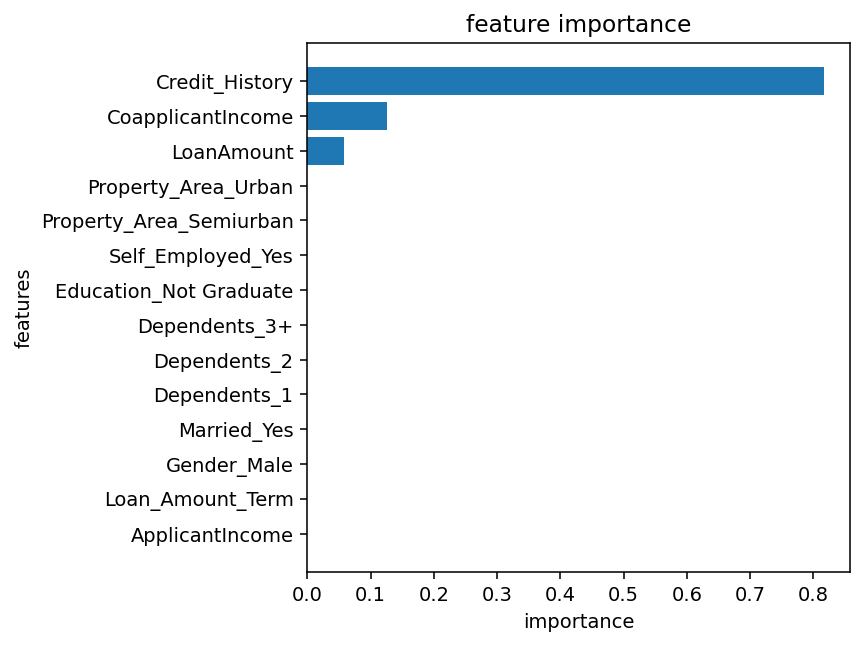

In [38]:
plt.figure(figsize=(5,5), dpi = 140)
plt.barh(k.index, k)
plt.xlabel('importance')
plt.ylabel('features')
plt.title('feature importance')
plt.show()

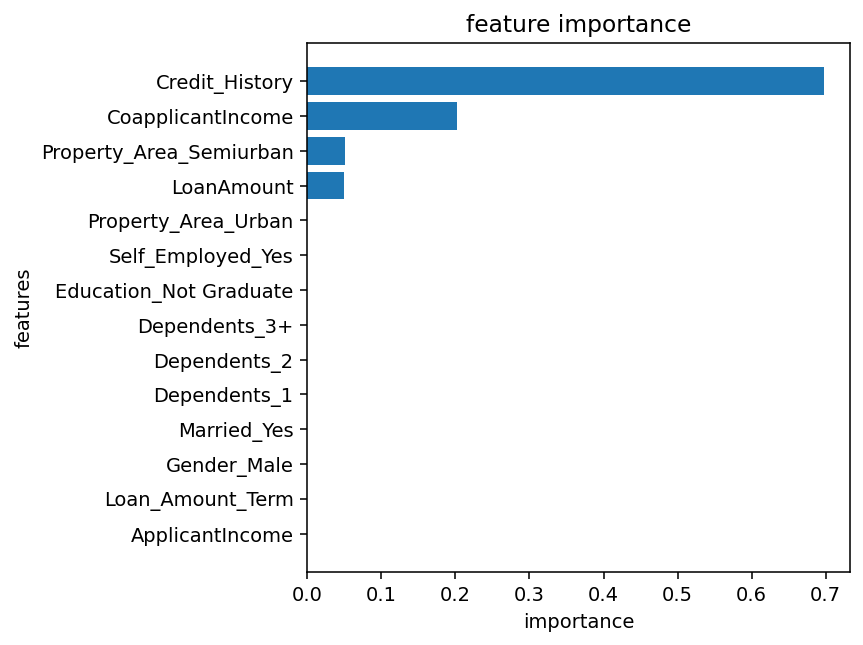

In [40]:
tree1 = DTC(max_depth = 4, min_samples_leaf =34, class_weight = 'balanced')
tree1.fit(xtrain,ytrain)
imp_features1 = pd.Series(tree1.feature_importances_, index = x_df.columns)
k1= imp_features1.sort_values()

plt.figure(figsize=(5,5), dpi = 140)
plt.barh(k1.index, k1)
plt.xlabel('importance')
plt.ylabel('features')
plt.title('feature importance')
plt.show()